### Coronary Heart Disease (관상동맥성 심장질환.)

#### 관상동맥성 심장질환 예측

- Sex: 남성 또는 여성("M" 또는 "F")
- Age: 환자의 연령;(연속적 - 기록된 연령이 정수로 절단되었음에도 불구하고 연령의 개념은 연속적) 행동
- Is_smoking: 환자가 현재 흡연자인지 여부("YES" 또는 "NO")
- Cigs Per Day: 하루에 평균적으로 피운 담배의 수. (담배의 수가 얼마든지 될 수 있기 때문에 연속적인 것으로 간주될 수 있습니다.) 
- BP Meds : 혈압약 복용 여부(명목)
- Prevalent Stroke: 환자가 이전에 뇌졸중을 앓았었는지 여부(명칭)
- Prevalent Hyp : 고혈압 여부 (명칭)
- Diabetes : 환자의 당뇨병 유무(명칭) 의학적(현재)
- Tot Chol : 총콜레스테롤 수치(연속)
- Sys BP: 수축기 혈압(연속)
- Dia BP : 이완기 혈압(Continuous)
- BMI: 체질량 지수(연속)
- Heart Rate: 심박수(Continuous - 의학 연구에서 심박수와 같은 변수는 실제로는 이산적이지만 많은 수의 가능한 값 때문에 연속적인 것으로 간주됩니다.)
- Glucose: 포도당 수준(연속) 예측변수(희망목표)
- TenYearCHD: 관상동맥성 심장 질환의 10년 위험 CHD (이진법: "1", "예", "0", "아니오"를 의미함) - DV

In [1]:
import pandas as pd

CHD_df = pd.read_csv('./datasets/CHD.csv')
display(CHD_df)
CHD_df.info()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### 결측치 검사

In [2]:
print(CHD_df.isna().sum())

CHD_df.describe().T

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


In [3]:
# glucose 결측치 중앙값으로 대체
CHD_df['glucose']=CHD_df['glucose'].fillna(CHD_df['glucose'].median())

# education 는 연속적인 값이 아니므로 결측치를 최빈값으로 대체
CHD_df['education']=CHD_df['education'].fillna(CHD_df['education'].mode()[0])

# BPMeds 는 연속적인 값이 아니므로 결측치를 최빈값으로 대체
CHD_df['BPMeds']=CHD_df['BPMeds'].fillna(CHD_df['BPMeds'].mode()[0])

# totChol 결측치 중앙값으로 대체
CHD_df['totChol']=CHD_df['totChol'].fillna(CHD_df['totChol'].median())

# cigsPerDay 결측치 평균값으로 대체
CHD_df['cigsPerDay']=CHD_df['cigsPerDay'].fillna(CHD_df['cigsPerDay'].mean())

# BMI 결측치 중앙값으로 대체
CHD_df['BMI']=CHD_df['BMI'].fillna(CHD_df['BMI'].median())

# heartRate 결측치 중앙값으로 대체
CHD_df['heartRate']=CHD_df['heartRate'].fillna(CHD_df['heartRate'].median())


print(CHD_df.isna().sum())

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


#### 중복행 검사

In [4]:
CHD_df.duplicated().sum()

0

#### sex, is_smoking   컬럼 레이블 인코딩

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
CHD_df['sex']= encoder.fit_transform(CHD_df['sex'])
CHD_df['is_smoking']= encoder.fit_transform(CHD_df['is_smoking'])

CHD_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [6]:
# id 컬럼 제거
CHD_df.drop(['id'],axis=1,inplace=True)

CHD_df = CHD_df[['age', 'sex', 'is_smoking', 'sysBP', 'diaBP', 'BMI', 'prevalentHyp', 'TenYearCHD']]
CHD_df

,age,sex,is_smoking,sysBP,diaBP,BMI,prevalentHyp,TenYearCHD
0,64,0,1,148.0,85.0,25.38,0,1
1,36,1,0,168.0,98.0,29.77,1,0
2,46,0,1,116.0,71.0,20.35,0,0
3,50,1,1,158.0,88.0,28.26,1,1
4,64,0,1,136.5,85.0,26.42,0,0
...,...,...,...,...,...,...,...,...
3385,60,0,0,123.5,79.0,29.28,0,0
3386,46,0,0,102.0,56.0,21.96,0,0
3387,44,1,1,164.0,119.0,28.92,1,1
3388,60,1,0,167.0,105.0,23.01,1,0


##### 상관 관계 분석

Text(0.5, 1.0, 'Correlation')

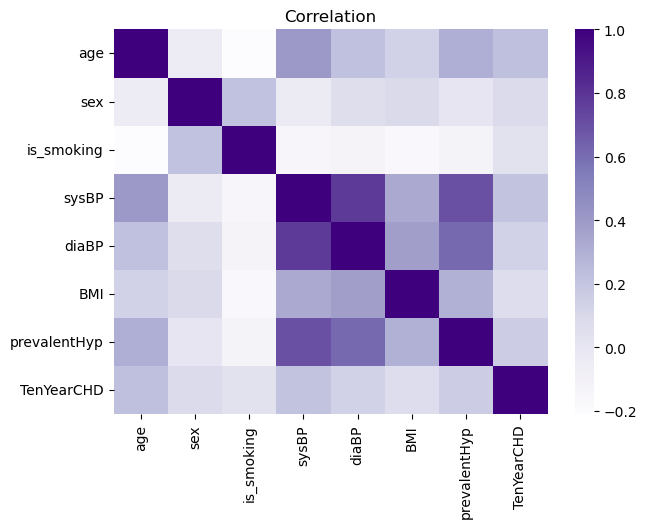

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = CHD_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Purples")
heatmap.set_title("Correlation")

In [8]:
# 1. 상관관계 수치를 내림차순 정렬
# 2. 첫 번째 행 추출(가장 수치가 높은 데이터의 행)
# 3. 내림차순 정렬(상관 관계가 높은 순)

corr.sort_values(by="TenYearCHD", ascending=False).iloc[0].sort_values(ascending=False)

TenYearCHD      1.000000
age             0.224927
sysBP           0.212703
prevalentHyp    0.166544
diaBP           0.135979
sex             0.084647
BMI             0.066134
is_smoking      0.034143
Name: TenYearCHD, dtype: float64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'is_smoking'}>],
       [<Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'prevalentHyp'}>, <Axes: >, <Axes: >]],
      dtype=object)

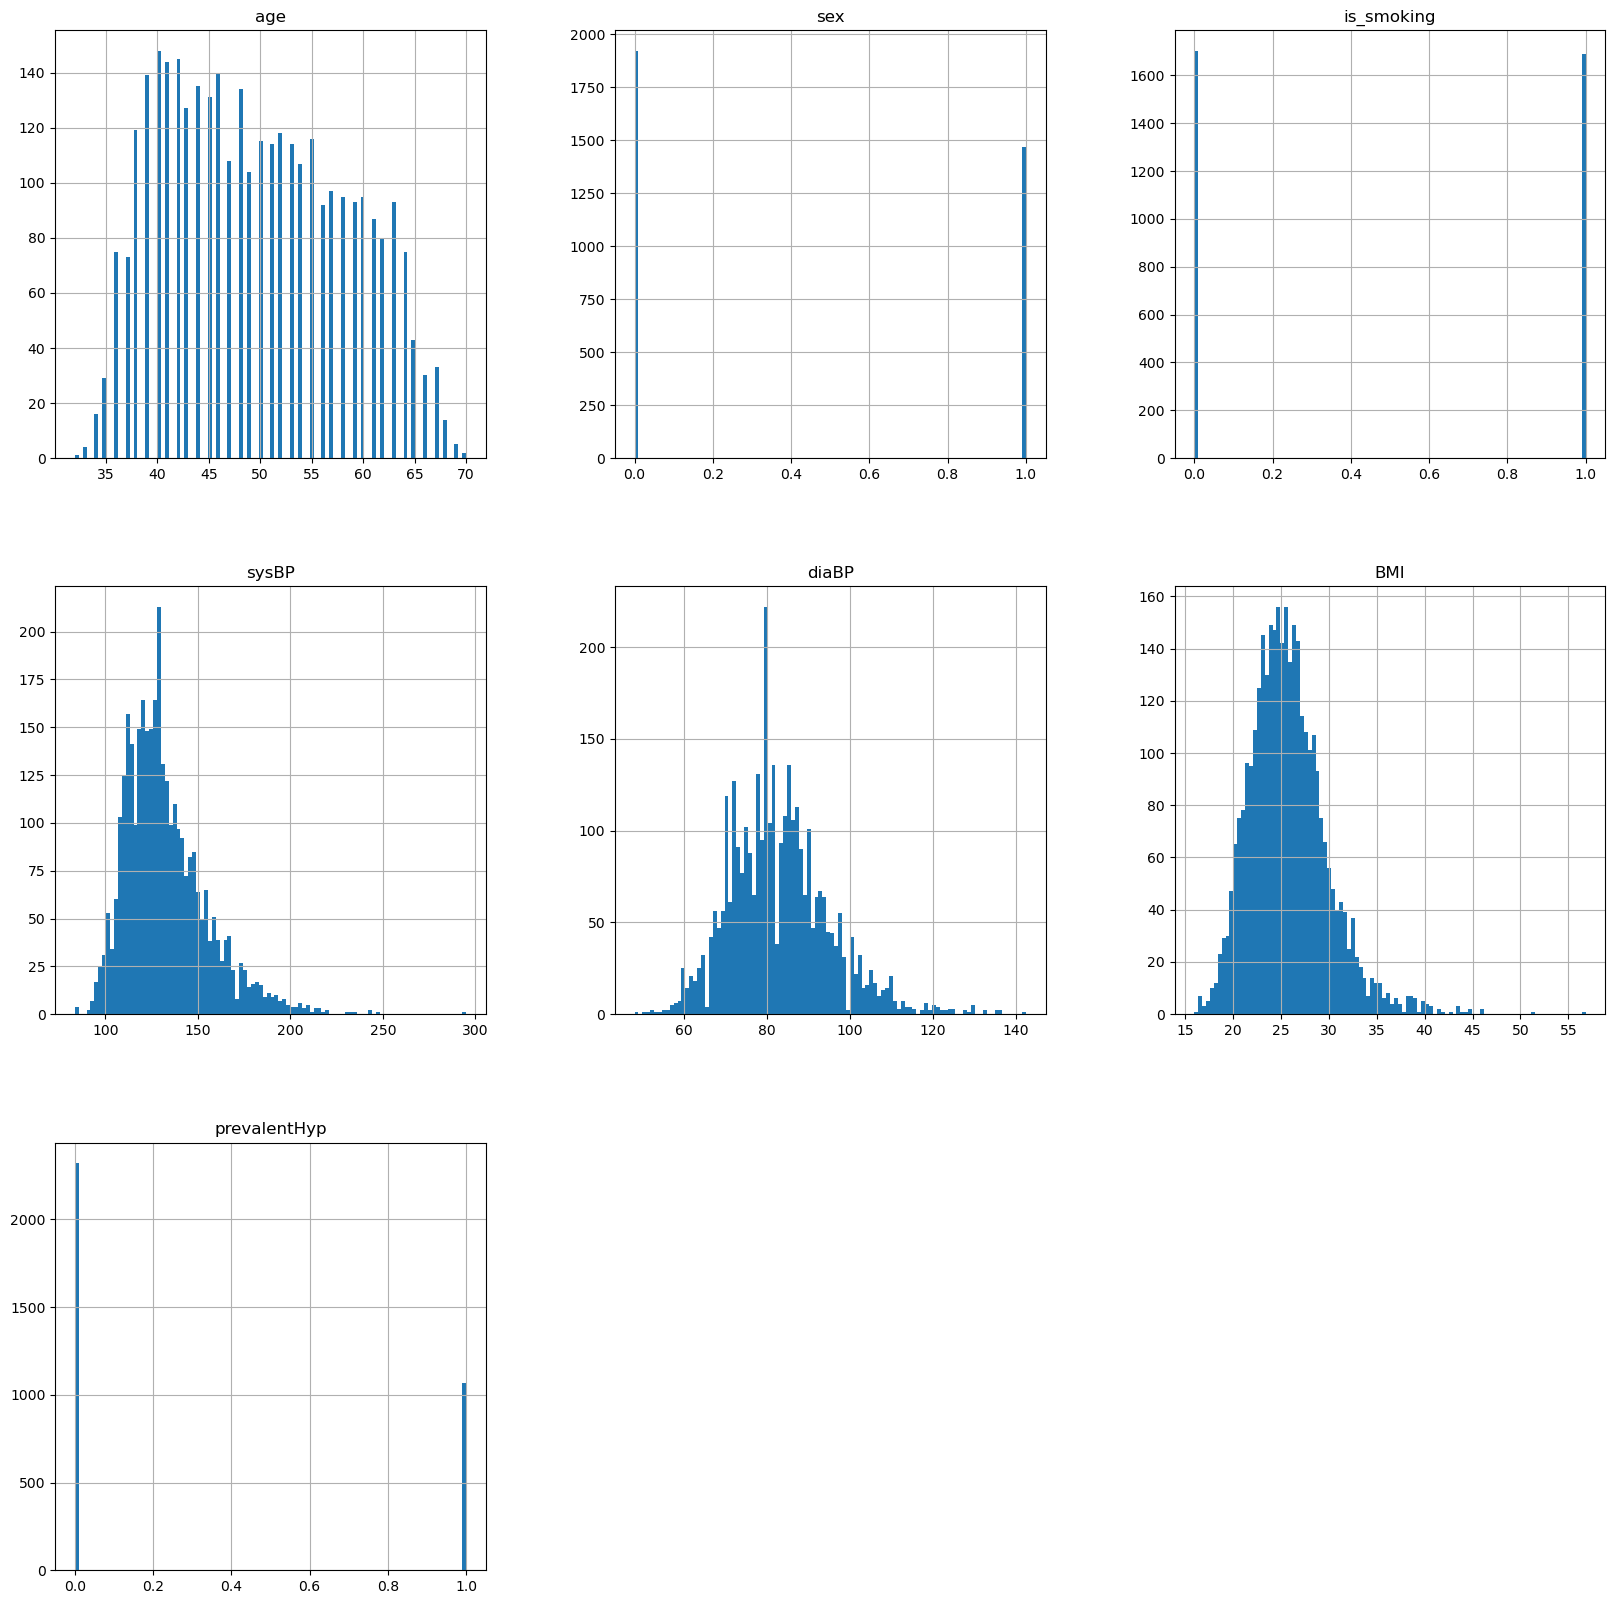

In [9]:
CHD_df.iloc[:, :-1].hist(figsize=(20, 20), bins=100)

##### 표준화를 통한 이상치 제거
- 표준화된 값이 평균을 기준으로 떨어져 있는 거리이므로, ±1.96 범위를 벗어난다면 이상치에 포함된다.  
- 상관 관계 비중이 높은 age, sysBP, diaBP, glucose 대해 이상치를 제거한다.

In [10]:
from sklearn.preprocessing import StandardScaler


scale = StandardScaler()
CHD_scaled = scale.fit_transform(CHD_df)
CHD_scaled_df = pd.DataFrame(CHD_scaled, columns=CHD_df.columns)


In [11]:
columns = ['age', 'sysBP', 'diaBP', 'BMI']

for column in columns:
    print(f'{column}: {CHD_scaled_df[~CHD_scaled_df[column].between(-1.96, 1.96)].shape[0]}건')

age: 55건
sysBP: 164건
diaBP: 164건
BMI: 145건


In [12]:
columns = ['age', 'sysBP', 'diaBP', 'BMI']
for column in columns:
    CHD_scaled_df.drop(CHD_scaled_df[~CHD_scaled_df[column].between(-1.96, 1.96)][column].index, axis=0, inplace=True)

for column in columns:
    print(f'{column}: {CHD_scaled_df[~CHD_scaled_df[column].between(-1.96, 1.96)].shape[0]}건')

age: 0건
sysBP: 0건
diaBP: 0건
BMI: 0건


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'is_smoking'}>],
       [<Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'prevalentHyp'}>, <Axes: >, <Axes: >]],
      dtype=object)

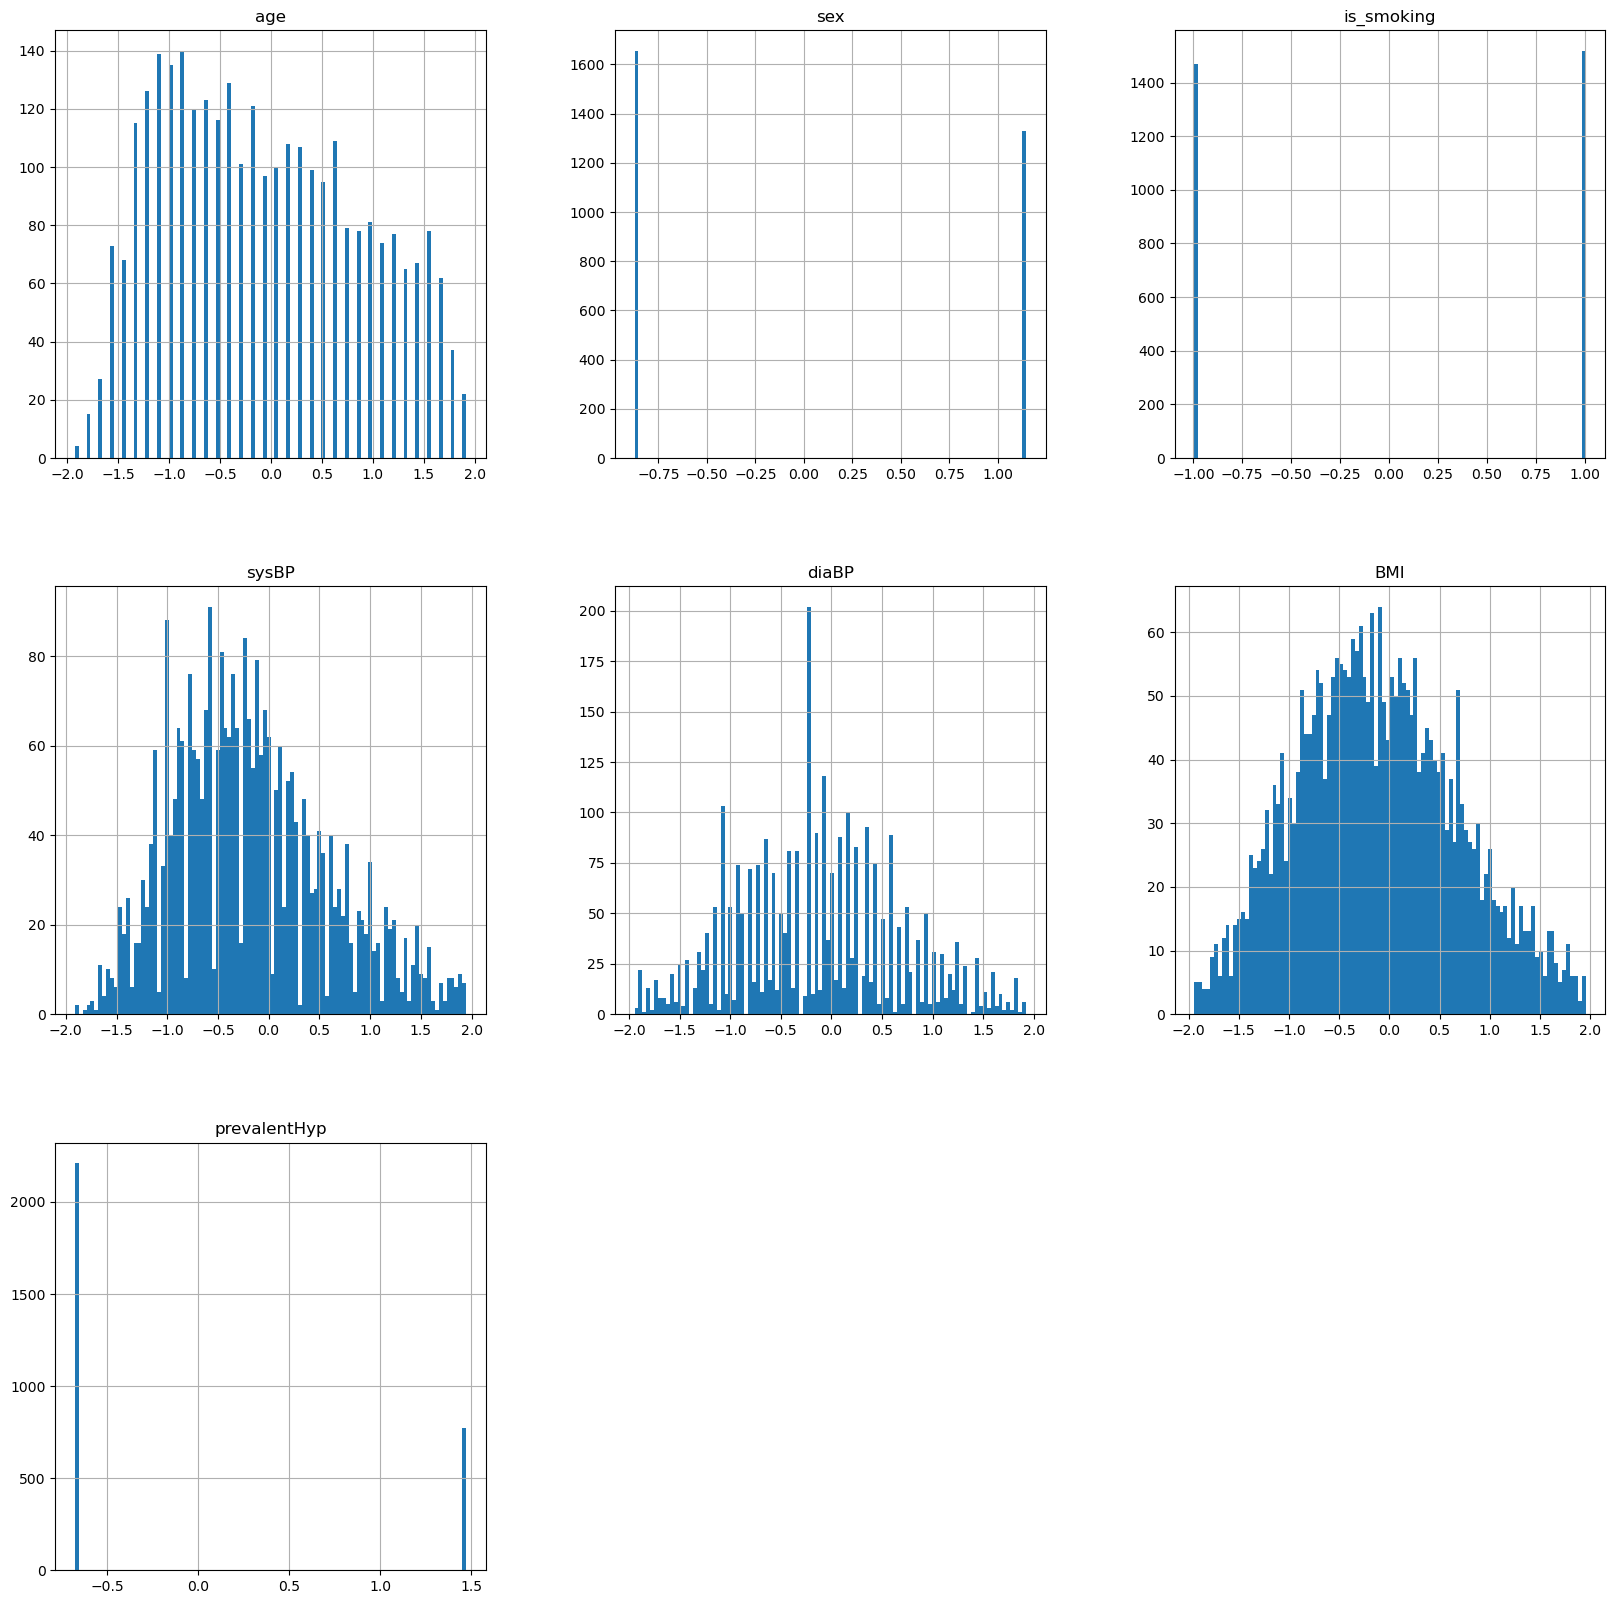

In [13]:
CHD_scaled_df.iloc[:, :-1].hist(figsize=(20, 20), bins=100)

In [14]:
CHD_df = CHD_df.iloc[CHD_scaled_df.index, :].reset_index(drop=True)
CHD_df

,age,sex,is_smoking,sysBP,diaBP,BMI,prevalentHyp,TenYearCHD
0,64,0,1,148.0,85.0,25.38,0,1
1,36,1,0,168.0,98.0,29.77,1,0
2,46,0,1,116.0,71.0,20.35,0,0
3,50,1,1,158.0,88.0,28.26,1,1
4,64,0,1,136.5,85.0,26.42,0,0
...,...,...,...,...,...,...,...,...
2982,43,1,0,129.0,90.0,25.29,1,0
2983,57,0,0,131.0,85.0,26.59,0,0
2984,60,0,0,123.5,79.0,29.28,0,0
2985,60,1,0,167.0,105.0,23.01,1,0


In [15]:
from sklearn.preprocessing import MinMaxScaler

features, targets = CHD_df.iloc[:, :-1], CHD_df.TenYearCHD

CHD_scaled = MinMaxScaler().fit_transform(features)
CHD_scaled_df = pd.DataFrame(CHD_scaled, columns=features.columns)
CHD_scaled_df

,age,sex,is_smoking,sysBP,diaBP,BMI,prevalentHyp
0,0.939394,0.0,1.0,0.674419,0.548387,0.472829,0.0
1,0.090909,1.0,0.0,0.906977,0.827957,0.747033,1.0
2,0.393939,0.0,1.0,0.302326,0.247312,0.158651,0.0
3,0.515152,1.0,1.0,0.790698,0.612903,0.652717,1.0
4,0.939394,0.0,1.0,0.540698,0.548387,0.537789,0.0
...,...,...,...,...,...,...,...
2982,0.303030,1.0,0.0,0.453488,0.655914,0.467208,1.0
2983,0.727273,0.0,0.0,0.476744,0.548387,0.548407,0.0
2984,0.818182,0.0,0.0,0.389535,0.419355,0.716427,0.0
2985,0.818182,1.0,0.0,0.895349,0.978495,0.324797,1.0


In [16]:
CHD_scaled_df['TenYearCHD'] = CHD_df['TenYearCHD']
CHD_scaled_df

,age,sex,is_smoking,sysBP,diaBP,BMI,prevalentHyp,TenYearCHD
0,0.939394,0.0,1.0,0.674419,0.548387,0.472829,0.0,1
1,0.090909,1.0,0.0,0.906977,0.827957,0.747033,1.0,0
2,0.393939,0.0,1.0,0.302326,0.247312,0.158651,0.0,0
3,0.515152,1.0,1.0,0.790698,0.612903,0.652717,1.0,1
4,0.939394,0.0,1.0,0.540698,0.548387,0.537789,0.0,0
...,...,...,...,...,...,...,...,...
2982,0.303030,1.0,0.0,0.453488,0.655914,0.467208,1.0,0
2983,0.727273,0.0,0.0,0.476744,0.548387,0.548407,0.0,0
2984,0.818182,0.0,0.0,0.389535,0.419355,0.716427,0.0,0
2985,0.818182,1.0,0.0,0.895349,0.978495,0.324797,1.0,0


In [17]:
CHD_scaled_df.TenYearCHD.value_counts()

TenYearCHD
0    2596
1     391
Name: count, dtype: int64

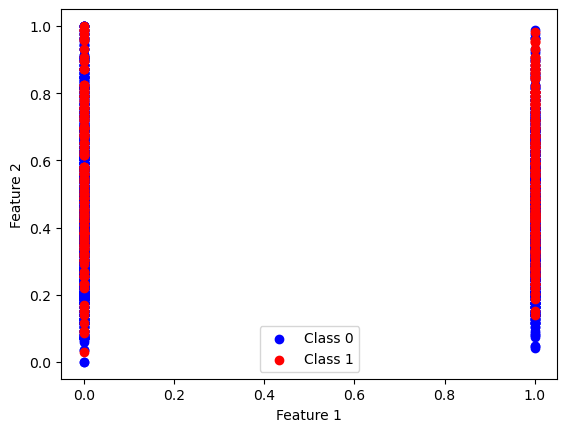

In [18]:
import matplotlib.pyplot as plt

# 예시 데이터: features는 특성, targets는 클래스 레이블
features, targets = CHD_scaled_df.iloc[:, :-1], CHD_scaled_df.TenYearCHD

# 클래스 0과 클래스 1의 인덱스를 추출
class_0_indices = (targets == 0)
class_1_indices = (targets == 1)

# 특성을 2차원으로 축소 (예시로 두 개의 특성만 사용)
feature_1 = features.iloc[:, 1]
feature_2 = features.iloc[:, 3]

# 클래스 0과 클래스 1을 나타내는 데이터 포인트를 서로 다른 색상으로 표시
plt.scatter(feature_1[class_0_indices], feature_2[class_0_indices], c='b', label='Class 0')
plt.scatter(feature_1[class_1_indices], feature_2[class_1_indices], c='r', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')

plt.show()

In [19]:
TenYearCHD_no = CHD_scaled_df[CHD_scaled_df.TenYearCHD == 0].sample(391)
TenYearCHD_yes = CHD_scaled_df[CHD_scaled_df.TenYearCHD == 1]

balance_CHD_df = pd.concat([TenYearCHD_no, TenYearCHD_yes])

balance_CHD_df.TenYearCHD.value_counts()

TenYearCHD
0    391
1    391
Name: count, dtype: int64

In [20]:
# TenYearCHD_no = CHD_scaled_df[CHD_scaled_df.TenYearCHD == 0].sample(391)
# TenYearCHD_yes = CHD_scaled_df[CHD_scaled_df.TenYearCHD == 1]

# balance_CHD_df = pd.concat([TenYearCHD_no, TenYearCHD_yes])

# balance_CHD_df.TenYearCHD.value_counts()

In [21]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import time
param_grid = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [6, 12, 18, 24],
    'min_samples_leaf': [4, 8, 12, 16]
}

random_forest_classifier = RandomForestClassifier(n_estimators=100)

features, targets = balance_CHD_df.iloc[:, :-1], balance_CHD_df.TenYearCHD

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.3, random_state=20)

# smote = SMOTE(random_state=0)
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# print('SMOTE 적용 전:\n',pd.Series(y_train).value_counts() )
# print('SMOTE 적용 후:\n',pd.Series(y_train_over).value_counts() )

grid_random_forest = GridSearchCV(random_forest_classifier, param_grid=param_grid, cv=10, n_jobs=3)

grid_random_forest.fit(X_train, y_train)

end_time = time.time()

# 소요된 시간 출력
elapsed_time = end_time - start_time
print(f"GridSearchCV 소요 시간: {elapsed_time} 초")

GridSearchCV 소요 시간: 46.049311876297 초


오차 행렬
[[83 34]
 [43 75]]
정확도: 0.6723, 정밀도: 0.6881, 재현율: 0.6356, F1:0.6608, AUC:0.6725
###########################################################################


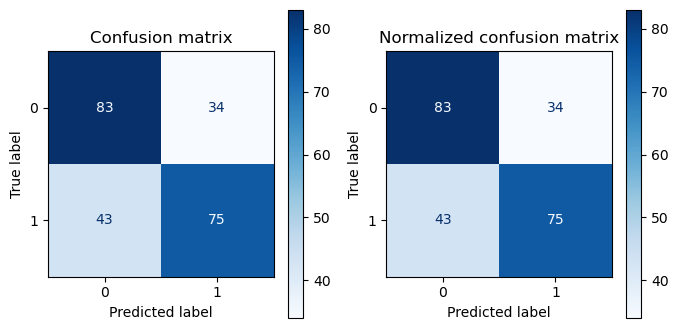

In [24]:
prediction = grid_random_forest.predict(X_test)
get_evaluation(y_test, prediction, grid_random_forest, X_test)

In [25]:
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
import time
from sklearn.ensemble import IsolationForest

# GridSearchCV 수행 시작 시간 설정.
start_time = time.time()

param_grid = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7]
}

xgb = XGBClassifier()
lgbm = LGBMClassifier()
                                                                                         
features, targets = CHD_scaled_df.iloc[:, :-1], CHD_scaled_df.TenYearCHD

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.3)

# 오버 샘플링
# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 적용 전:\n',pd.Series(y_train).value_counts() )
print('SMOTE 적용 후:\n',pd.Series(y_train_over).value_counts() )

# 이상치 탐지 모델 생성
outlier_detector = IsolationForest(contamination=0.05)  # contamination은 이상치 비율을 나타냅니다.

# 이상치 탐지 모델을 학습 데이터에 적용
outliers = outlier_detector.fit_predict(X_train_over)


# 이상치가 아닌 데이터만 선택
X_train_clean = X_train_over[outliers == 1]
y_train_clean = y_train_over[outliers == 1]



# 학습 데이터를 검증 데이터로 분리
X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.3)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

grid_lgbm = GridSearchCV(lgbm, param_grid, cv=3, refit=True, return_train_score=True, n_jobs=-1, error_score='raise')
grid_lgbm.fit(X_train_clean, y_train_clean, early_stopping_rounds=50, eval_set=evals)

grid_xgb = GridSearchCV(xgb, param_grid, cv=3, refit=True, return_train_score=True, n_jobs=-1, error_score='raise')
grid_xgb.fit(X_train_clean, y_train_clean, early_stopping_rounds=50, eval_set=evals)

print("GridSearchCV 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

SMOTE 적용 전:
 TenYearCHD
0    1816
1     274
Name: count, dtype: int64
SMOTE 적용 후:
 TenYearCHD
0    1816
1    1816
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.61961	valid_1's binary_logloss: 0.630393
[2]	valid_0's binary_logloss: 0.568388	valid_1's binary_logloss: 0.581668
[3]	valid_0's binary_logloss: 0.532653	valid_1's binary_logloss: 0.546217
[4]	valid_0's binary_logloss: 0.487537	valid_1's binary_logloss: 0.496974
[5]	valid_0's binary_logloss: 0.469457	valid_1's binary_logloss: 0.473598
[6]	valid_0's binary_logloss: 0.446973	valid_1's binary_logloss: 0.456386
[7]	valid_0's binary_logloss: 0.429276	valid_1's binary_logloss: 0.436493
[8]	valid_0's binary_logloss: 0.406296	valid_1's binary_logloss: 0.413872
[9]	valid_0's binary_logloss: 0.391198	valid_1's binary_logloss: 0.400575
[10]	valid_0's binary_logloss: 0.376475	valid_1's binary_logloss: 0.3874
[11]	valid_0's binary_logloss: 0.366252	valid_1's binary_logloss: 0.376506
[12]	valid_0's binary_logloss: 0.35665	valid_1's binary_logloss: 0.367824
[13]	valid_0's binary_logloss: 0.34843	valid_1's binary_logloss: 0.360373
[14]	valid_0's binary_logloss: 0.339679

[0]	validation_0-logloss:0.62658	validation_1-logloss:0.62860
[1]	validation_0-logloss:0.58062	validation_1-logloss:0.58704
[2]	validation_0-logloss:0.55599	validation_1-logloss:0.55801
[3]	validation_0-logloss:0.53295	validation_1-logloss:0.53576
[4]	validation_0-logloss:0.51423	validation_1-logloss:0.51838
[5]	validation_0-logloss:0.49242	validation_1-logloss:0.49981
[6]	validation_0-logloss:0.47494	validation_1-logloss:0.47782
[7]	validation_0-logloss:0.46355	validation_1-logloss:0.46800
[8]	validation_0-logloss:0.44661	validation_1-logloss:0.44787
[9]	validation_0-logloss:0.43241	validation_1-logloss:0.43587
[10]	validation_0-logloss:0.42737	validation_1-logloss:0.43039
[11]	validation_0-logloss:0.41390	validation_1-logloss:0.42029
[12]	validation_0-logloss:0.40777	validation_1-logloss:0.41621
[13]	validation_0-logloss:0.40420	validation_1-logloss:0.41265
[14]	validation_0-logloss:0.39842	validation_1-logloss:0.40766
[15]	validation_0-logloss:0.39312	validation_1-logloss:0.40144
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-logloss:0.28019	validation_1-logloss:0.27118
[44]	validation_0-logloss:0.27621	validation_1-logloss:0.26671
[45]	validation_0-logloss:0.27047	validation_1-logloss:0.26190
[46]	validation_0-logloss:0.26812	validation_1-logloss:0.25933
[47]	validation_0-logloss:0.26450	validation_1-logloss:0.25595
[48]	validation_0-logloss:0.25964	validation_1-logloss:0.25136
[49]	validation_0-logloss:0.25841	validation_1-logloss:0.24909
[50]	validation_0-logloss:0.25693	validation_1-logloss:0.24620
[51]	validation_0-logloss:0.25580	validation_1-logloss:0.24279
[52]	validation_0-logloss:0.25371	validation_1-logloss:0.24049
[53]	validation_0-logloss:0.25129	validation_1-logloss:0.23879
[54]	validation_0-logloss:0.24825	validation_1-logloss:0.23670
[55]	validation_0-logloss:0.24344	validation_1-logloss:0.23350
[56]	validation_0-logloss:0.24198	validation_1-logloss:0.23227
[57]	validation_0-logloss:0.23951	validation_1-logloss:0.23028
[58]	validation_0-logloss:0.23706	validation_1-logloss:

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

adab = AdaBoostClassifier()
adab= adab.fit(X_train_clean, y_train_clean)

xgb = XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
xgb = xgb.fit(X_train_clean, y_train_clean)

y_pred_adab = adab.predict(X_test)
print("정확도 : ", adab.score(X_train_clean, y_train_clean))
print("정확도 : ", adab.score(X_test, y_test))
print("\n")

y_pred_xgb = xgb.predict(X_test)
print("정확도 : ", xgb.score(X_train_clean, y_train_clean))
print("정확도 : ", xgb.score(X_test, y_test))

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


정확도 :  0.7121739130434782
정확도 :  0.6254180602006689


정확도 :  0.9878260869565217
정확도 :  0.830546265328874


In [38]:
adab.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [39]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'mlogloss',
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [40]:
from sklearn.model_selection import GridSearchCV
import numpy as np 
param_grid = {'learning_rate':np.arange(0.5, 1.5, 0.1)}
model_grid_adaboost = GridSearchCV(AdaBoostClassifier(n_estimators=100), param_grid, cv=5)
model_grid_adaboost.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=100),
             param_grid={'learning_rate': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4])})

In [74]:
# DataFrame으로 변환
scores_df = pd.DataFrame(grid_lgbm.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.596049,1,0.557377,0.637363,0.593407
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.592406,2,0.546448,0.631868,0.598901
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.586921,3,0.540984,0.626374,0.593407
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.586921,3,0.540984,0.626374,0.593407
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.575902,5,0.557377,0.593407,0.576923
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.575902,5,0.557377,0.593407,0.576923
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.572299,7,0.524590,0.620879,0.571429
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.561310,8,0.524590,0.587912,0.571429
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.561310,8,0.524590,0.587912,0.571429


In [23]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt
# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test, prediction)
#     정밀도
    precision = precision_score(y_test, prediction)
#     재현율
    recall = recall_score(y_test, prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[731  49]
 [103  14]]
정확도: 0.8305, 정밀도: 0.2222, 재현율: 0.1197, F1:0.1556, AUC:0.5284
###########################################################################


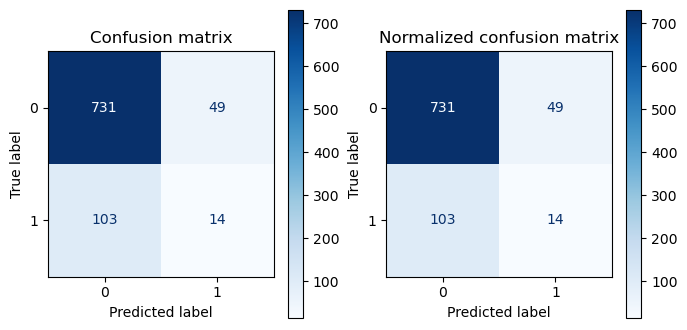

In [35]:
prediction = grid_xgb.predict(X_test)
get_evaluation(y_test, prediction, grid_xgb, X_test)

오차 행렬
[[730  50]
 [ 98  19]]
정확도: 0.8350, 정밀도: 0.2754, 재현율: 0.1624, F1:0.2043, AUC:0.5491
###########################################################################


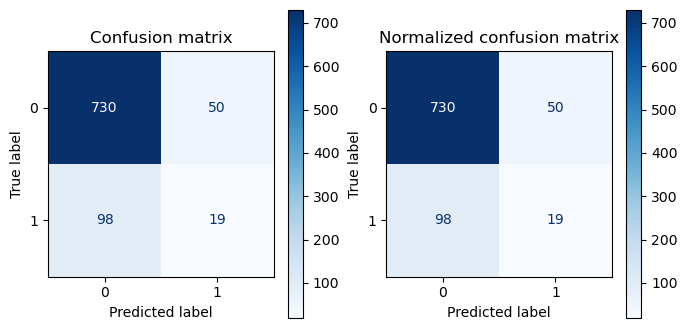

In [36]:
prediction = grid_lgbm.predict(X_test)
get_evaluation(y_test, prediction, grid_lgbm, X_test)

In [77]:
from sklearn.preprocessing import Binarizer

def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임곗값:', threshold)
        get_evaluation(y_test, custom_prediction, prediction_proba_class1)

In [78]:
import numpy as np
from sklearn.preprocessing import Binarizer
from sklearn.metrics import precision_recall_curve


prediction_prob = grid_lgbm.predict_proba(X_test)
prediction_prob_class1 = prediction_prob[:, 1].reshape(-1, 1)

precision, recall, thresholds = precision_recall_curve(y_test, prediction_prob_class1)

get_evaluation_by_thresholds(y_test, prediction_prob_class1, thresholds)

임곗값: 1.6151614914090013e-05
오차 행렬
[[  1 116]
 [  0 118]]
정확도: 0.5064, 정밀도: 0.5043, 재현율: 1.0000, F1:0.6705, AUC:0.5043
###########################################################################
임곗값: 3.858852356840213e-05
오차 행렬
[[  1 116]
 [  1 117]]
정확도: 0.5021, 정밀도: 0.5021, 재현율: 0.9915, F1:0.6667, AUC:0.5000
###########################################################################
임곗값: 6.0329427241915035e-05
오차 행렬
[[  2 115]
 [  1 117]]
정확도: 0.5064, 정밀도: 0.5043, 재현율: 0.9915, F1:0.6686, AUC:0.5043
###########################################################################
임곗값: 9.184092446320361e-05
오차 행렬
[[  2 115]
 [  2 116]]
정확도: 0.5021, 정밀도: 0.5022, 재현율: 0.9831, F1:0.6648, AUC:0.5001
###########################################################################
임곗값: 0.00013516399307449928
오차 행렬
[[  3 114]
 [  2 116]]
정확도: 0.5064, 정밀도: 0.5043, 재현율: 0.9831, F1:0.6667, AUC:0.5043
###########################################################################
임곗값: 0.0002373857314756624
오차 행렬

오차 행렬
[[28 89]
 [19 99]]
정확도: 0.5404, 정밀도: 0.5266, 재현율: 0.8390, F1:0.6471, AUC:0.5391
###########################################################################
임곗값: 0.043549091686616935
오차 행렬
[[28 89]
 [20 98]]
정확도: 0.5362, 정밀도: 0.5241, 재현율: 0.8305, F1:0.6426, AUC:0.5349
###########################################################################
임곗값: 0.046474083781797314
오차 행렬
[[28 89]
 [21 97]]
정확도: 0.5319, 정밀도: 0.5215, 재현율: 0.8220, F1:0.6382, AUC:0.5307
###########################################################################
임곗값: 0.05177915005340324
오차 행렬
[[28 89]
 [22 96]]
정확도: 0.5277, 정밀도: 0.5189, 재현율: 0.8136, F1:0.6337, AUC:0.5264
###########################################################################
임곗값: 0.0531818078194158
오차 행렬
[[28 89]
 [23 95]]
정확도: 0.5234, 정밀도: 0.5163, 재현율: 0.8051, F1:0.6291, AUC:0.5222
###########################################################################
임곗값: 0.05573721696999069
오차 행렬
[[29 88]
 [23 95]]
정확도: 0.5277, 정밀도: 0.5191, 재현율: 0.8051, 

오차 행렬
[[52 65]
 [49 69]]
정확도: 0.5149, 정밀도: 0.5149, 재현율: 0.5847, F1:0.5476, AUC:0.5146
###########################################################################
임곗값: 0.49528622976572956
오차 행렬
[[53 64]
 [49 69]]
정확도: 0.5191, 정밀도: 0.5188, 재현율: 0.5847, F1:0.5498, AUC:0.5189
###########################################################################
임곗값: 0.4978953515007424
오차 행렬
[[53 64]
 [50 68]]
정확도: 0.5149, 정밀도: 0.5152, 재현율: 0.5763, F1:0.5440, AUC:0.5146
###########################################################################
임곗값: 0.514024593037393
오차 행렬
[[54 63]
 [50 68]]
정확도: 0.5191, 정밀도: 0.5191, 재현율: 0.5763, F1:0.5462, AUC:0.5189
###########################################################################
임곗값: 0.5145744972908368
오차 행렬
[[54 63]
 [51 67]]
정확도: 0.5149, 정밀도: 0.5154, 재현율: 0.5678, F1:0.5403, AUC:0.5147
###########################################################################
임곗값: 0.5256853623575071
오차 행렬
[[55 62]
 [51 67]]
정확도: 0.5191, 정밀도: 0.5194, 재현율: 0.5678, F1:0.5

오차 행렬
[[81 36]
 [70 48]]
정확도: 0.5489, 정밀도: 0.5714, 재현율: 0.4068, F1:0.4752, AUC:0.5495
###########################################################################
임곗값: 0.8738613579809492
오차 행렬
[[81 36]
 [71 47]]
정확도: 0.5447, 정밀도: 0.5663, 재현율: 0.3983, F1:0.4677, AUC:0.5453
###########################################################################
임곗값: 0.8743821323573059
오차 행렬
[[81 36]
 [72 46]]
정확도: 0.5404, 정밀도: 0.5610, 재현율: 0.3898, F1:0.4600, AUC:0.5411
###########################################################################
임곗값: 0.8772544709491774
오차 행렬
[[81 36]
 [73 45]]
정확도: 0.5362, 정밀도: 0.5556, 재현율: 0.3814, F1:0.4523, AUC:0.5368
###########################################################################
임곗값: 0.8793902740532942
오차 행렬
[[82 35]
 [73 45]]
정확도: 0.5404, 정밀도: 0.5625, 재현율: 0.3814, F1:0.4545, AUC:0.5411
###########################################################################
임곗값: 0.8854382968329074
오차 행렬
[[83 34]
 [73 45]]
정확도: 0.5447, 정밀도: 0.5696, 재현율: 0.3814, F1:0.4

오차 행렬
[[ 99  18]
 [105  13]]
정확도: 0.4766, 정밀도: 0.4194, 재현율: 0.1102, F1:0.1745, AUC:0.4782
###########################################################################
임곗값: 0.9853045065749165
오차 행렬
[[ 99  18]
 [106  12]]
정확도: 0.4723, 정밀도: 0.4000, 재현율: 0.1017, F1:0.1622, AUC:0.4739
###########################################################################
임곗값: 0.9861773807038404
오차 행렬
[[100  17]
 [106  12]]
정확도: 0.4766, 정밀도: 0.4138, 재현율: 0.1017, F1:0.1633, AUC:0.4782
###########################################################################
임곗값: 0.9862208558331194
오차 행렬
[[101  16]
 [106  12]]
정확도: 0.4809, 정밀도: 0.4286, 재현율: 0.1017, F1:0.1644, AUC:0.4825
###########################################################################
임곗값: 0.9862954256112293
오차 행렬
[[101  16]
 [107  11]]
정확도: 0.4766, 정밀도: 0.4074, 재현율: 0.0932, F1:0.1517, AUC:0.4782
###########################################################################
임곗값: 0.9878323149479831
오차 행렬
[[101  16]
 [108  10]]
정확도: 0.4723, 정밀도: 0.3

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
prediction = Binarizer(threshold=0.058532754789966016).fit_transform(prediction_prob_class1)
get_evaluation(y_test, prediction, grid_random_forest, X_test)

NameError: name 'grid_random_forest' is not defined